## Writing unigrams, bigrams and trigrams from scratch

Unigrams

In [40]:
sentence = "A quick brown fox jumps over the lazy dog A quick brown dog"

In [41]:
words = sentence.split(' ')

In [42]:
freq = {}
def CountFrequency(my_list):
    for item in my_list:
        if (item in freq):
            freq[item] += 1
        else:
            freq[item] = 1
    for key, value in freq.items():
        print ("% s : % d"%(key, value))
    return freq
CountFrequency(words)

A :  2
quick :  2
brown :  2
fox :  1
jumps :  1
over :  1
the :  1
lazy :  1
dog :  2


{'A': 2,
 'quick': 2,
 'brown': 2,
 'fox': 1,
 'jumps': 1,
 'over': 1,
 'the': 1,
 'lazy': 1,
 'dog': 2}

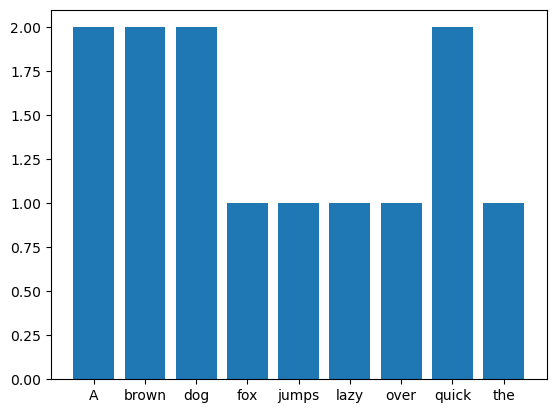

In [43]:
import matplotlib.pylab as plt

lists = sorted(freq.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.bar(x, y)
plt.show()

Bigrams

In [44]:
bigrams = []

In [45]:
for x in range(len(words)-1):
    bigrams.append(words[x:x+2])

In [46]:
bigrams

[['A', 'quick'],
 ['quick', 'brown'],
 ['brown', 'fox'],
 ['fox', 'jumps'],
 ['jumps', 'over'],
 ['over', 'the'],
 ['the', 'lazy'],
 ['lazy', 'dog'],
 ['dog', 'A'],
 ['A', 'quick'],
 ['quick', 'brown'],
 ['brown', 'dog']]

Trigrams

In [47]:
trigrams = []

In [48]:
for x in range(len(words)-2):
    trigrams.append(words[x:x+3])

In [49]:
trigrams

[['A', 'quick', 'brown'],
 ['quick', 'brown', 'fox'],
 ['brown', 'fox', 'jumps'],
 ['fox', 'jumps', 'over'],
 ['jumps', 'over', 'the'],
 ['over', 'the', 'lazy'],
 ['the', 'lazy', 'dog'],
 ['lazy', 'dog', 'A'],
 ['dog', 'A', 'quick'],
 ['A', 'quick', 'brown'],
 ['quick', 'brown', 'dog']]

## POS tagging


In [50]:
from nltk import pos_tag
from nltk import RegexpParser
text = words
print("After Split:",text)
tokens_tag = pos_tag(text)
print("After Token:",tokens_tag)

After Split: ['A', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog', 'A', 'quick', 'brown', 'dog']
After Token: [('A', 'DT'), ('quick', 'JJ'), ('brown', 'NN'), ('fox', 'NN'), ('jumps', 'VBZ'), ('over', 'IN'), ('the', 'DT'), ('lazy', 'JJ'), ('dog', 'NN'), ('A', 'NNP'), ('quick', 'JJ'), ('brown', 'NN'), ('dog', 'NN')]


In [51]:
from collections import Counter
import nltk
text = sentence
lower_case = text.lower()
tokens = nltk.word_tokenize(lower_case)
tags = nltk.pos_tag(tokens)
counts = Counter( tag for word,  tag in tags)
print(counts)

Counter({'NN': 5, 'DT': 3, 'JJ': 3, 'VBZ': 1, 'IN': 1})


## Plotting graphs of POS tags

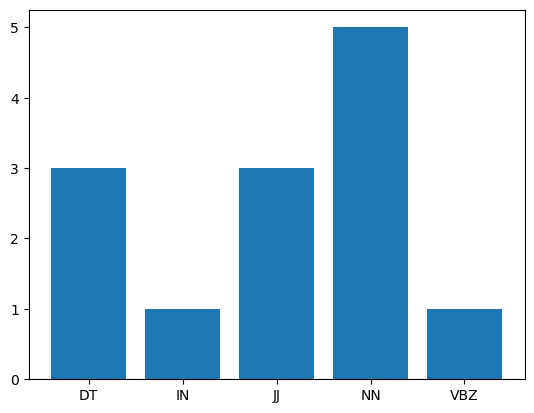

In [52]:
lists = sorted(counts.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.bar(x, y)
plt.show()

In [53]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer()
v.fit(['A quick brown fox jumps over the lazy dog A quick brown dog'])
v.vocabulary_

{'quick': 6,
 'brown': 0,
 'fox': 2,
 'jumps': 3,
 'over': 5,
 'the': 7,
 'lazy': 4,
 'dog': 1}

## Loading corpus and applying all on it

In [54]:
from nltk.corpus import brown

In [55]:
bw = brown.words()

In [56]:
from nltk import pos_tag
from nltk import RegexpParser
text = bw[:32]
print("After Split:",text)
tokens_tag = pos_tag(text)
print("After Token:",tokens_tag)

After Split: ['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', 'Friday', 'an', 'investigation', 'of', "Atlanta's", 'recent', 'primary', 'election', 'produced', '``', 'no', 'evidence', "''", 'that', 'any', 'irregularities', 'took', 'place', '.', 'The', 'jury', 'further', 'said', 'in', 'term-end', 'presentments']
After Token: [('The', 'DT'), ('Fulton', 'NNP'), ('County', 'NNP'), ('Grand', 'NNP'), ('Jury', 'NNP'), ('said', 'VBD'), ('Friday', 'NNP'), ('an', 'DT'), ('investigation', 'NN'), ('of', 'IN'), ("Atlanta's", 'NNP'), ('recent', 'JJ'), ('primary', 'JJ'), ('election', 'NN'), ('produced', 'VBD'), ('``', '``'), ('no', 'DT'), ('evidence', 'NN'), ("''", "''"), ('that', 'IN'), ('any', 'DT'), ('irregularities', 'NNS'), ('took', 'VBD'), ('place', 'NN'), ('.', '.'), ('The', 'DT'), ('jury', 'NN'), ('further', 'RB'), ('said', 'VBD'), ('in', 'IN'), ('term-end', 'JJ'), ('presentments', 'NNS')]


In [57]:
from collections import Counter
import nltk
text = brown.raw()[:320]
lower_case = text.lower()
tokens = nltk.word_tokenize(lower_case)
tags = nltk.pos_tag(tokens)
counts = Counter( tag for word,  tag in tags)
print(counts)

Counter({'NN': 16, 'JJ': 13, '``': 3, 'VBD': 2, '$': 1, "''": 1, 'NNP': 1, '.': 1})


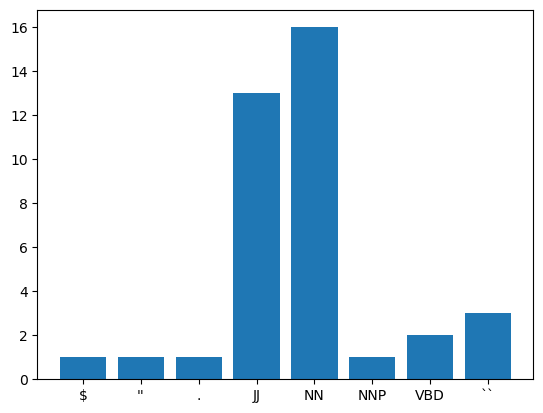

In [58]:
lists = sorted(counts.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.bar(x, y)
plt.show()

In [59]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer()
v.fit(brown.words()[:32])
v.vocabulary_

{'the': 25,
 'fulton': 8,
 'county': 3,
 'grand': 10,
 'jury': 14,
 'said': 22,
 'friday': 7,
 'an': 0,
 'investigation': 12,
 'of': 16,
 'atlanta': 2,
 'recent': 21,
 'primary': 19,
 'election': 4,
 'produced': 20,
 'no': 15,
 'evidence': 6,
 'that': 24,
 'any': 1,
 'irregularities': 13,
 'took': 26,
 'place': 17,
 'further': 9,
 'in': 11,
 'term': 23,
 'end': 5,
 'presentments': 18}